<a href="https://colab.research.google.com/github/trishaha/STAT108-Student-Success-Dashboard/blob/main/STAT108_Ridge_Lasso_ElasticNet_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ridge Regression and Lasso Regression Predictive Modeling**


Which is better?

Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (ergo: when only a few predictors actually influence the response). Ridge works well if there are many large parameters of about the same value (ergo: when most predictors impact the response)

##**Load Dataset**

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/talamo13/Student-Success-Dashboard/main/Stat108-F20-S21")
df=df.fillna(0)
df

,Student ID,SEMESTER,HW 1 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 2 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 3 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 4 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 5 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 6 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 7 Points Grade <Numeric MaxPoints:8 Category:Homework>,HW 8 Points Grade <Numeric MaxPoints:8 Category:Homework>,...,Quiz 2 Points Grade <Numeric MaxPoints:33 Category:Quizzes>,Quiz 3 Points Grade <Numeric MaxPoints:33 Category:Quizzes>,QUIZ,Midterm 1 Points Grade <Numeric MaxPoints:100 Category:Midterms>,Midterm 2 Points Grade <Numeric MaxPoints:100 Category:Midterms>,MID,Final Points Grade <Numeric MaxPoints:150 Category:Final Exam>,TOTAL,GRADE,STAT 90 Text Grade <Text>
0,F20.1,F,0.00,7.80,7.7800,7.60,7.84,1.06,4.00,0.0,...,16.5000,0.0000,36.5000,70.28,76.40,146.68,30.00,458.67600,F,0.0
1,F20.2,F,7.79,8.00,6.6400,8.00,8.00,7.85,8.00,8.0,...,30.2500,25.3011,86.5511,86.15,97.20,183.35,131.00,944.25610,A,0.0
2,F20.3,F,6.52,7.80,7.9000,7.53,0.00,7.25,7.71,8.0,...,27.5000,14.6289,58.1289,0.00,74.54,74.54,50.00,554.18390,D,0.0
3,F20.4,F,7.34,8.00,8.0000,8.00,7.92,7.70,8.00,8.0,...,30.2500,30.7989,95.0489,96.00,94.68,190.68,114.00,950.64090,A,0.0
4,F20.5,F,5.80,6.82,6.3325,7.41,5.80,7.40,6.58,8.0,...,17.8750,13.5300,50.4050,72.50,65.34,137.84,117.00,814.57675,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,S21.102,S,8.00,8.00,8.0000,7.83,8.00,7.96,8.00,8.0,...,33.0000,33.0000,96.5100,86.50,95.36,181.86,150.00,994.37000,A,0.0
244,S21.103,S,7.92,7.64,7.8100,7.83,8.00,7.92,8.00,8.0,...,33.0000,33.0000,97.9900,93.50,91.66,185.16,150.00,996.15000,A,0.0
245,S21.104,S,8.00,7.80,8.0000,7.66,8.00,7.90,8.00,8.0,...,33.0000,33.0000,94.0000,98.00,96.00,194.00,134.65,998.65000,A,0.0
246,S21.105,S,7.88,8.00,8.0000,8.00,8.00,7.96,7.71,8.0,...,32.4918,26.6739,90.1757,98.50,98.00,196.50,147.62,1000.29570,A,0.0


#**Midterm 1 Features**

In [3]:
#Midterm 1 assignments
midterm1_x = df.loc[:,[
    'HW 1 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 2 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 3 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 4 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 5 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 6 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'Week 1 Aug 24 to28 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 2 Aug 31 to Sep 4 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 3 Sep 7 to 11 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 4 Sep 14 to 18 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 5 Sep 21 to 25 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 1 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 1 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 2 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 2 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 3 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 3 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 4 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 4 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 5 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 5 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Quiz 1 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
       'Quiz 1 Points Grade <Numeric MaxPoints:33 Category:Quizzes>']]

midterm1_y = df['Midterm 1 Points Grade <Numeric MaxPoints:100 Category:Midterms>']

#**Training and Test Data**

Split the data training=0.8 and test=0.2


In [4]:
from sklearn.model_selection import train_test_split

X1=midterm1_x
y1=midterm1_y

(X_train1, X_test1, y_train1, y_test1) = train_test_split(X1, y1, test_size=0.2, random_state=0) #random state used for reproducibility
#print("Training set", X_train1)
#print("Test set", y_test1)

#**Ridge Regression**

In [5]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=1.0)
rr.fit(X_train1, y_train1)

Ridge()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_rr_train_pred = rr.predict(X_train1)
y_rr_test_pred = rr.predict(X_test1)
print("Train:", r2_score(y_train1, y_rr_train_pred))
print("Test:", r2_score(y_test1, y_rr_test_pred))

# Training Set
rr_train_mse = mean_squared_error(y_train1, y_rr_train_pred)
rr_train_r2 = r2_score(y_train1, y_rr_train_pred)

# Testing Set
rr_test_mse = mean_squared_error(y_test1, y_rr_test_pred)
rr_test_r2 = r2_score(y_test1, y_rr_test_pred)

Train: 0.6630408671932708
Test: 0.48648327950799763


In [7]:
rr_performance_data = [['Midterm 1 Ridge Regression', rr_train_mse, rr_train_r2, rr_test_mse, rr_test_r2]]
midterm_all_performance = pd.DataFrame(rr_performance_data, columns=['Model', 'Training MSE', 'Training R2 Score', 'Testing MSE', 'Testing R2 Score'])
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 1 Ridge Regression,140.123846,0.663041,249.78077,0.486483


#**Ridge Regression Cross Validation**

I will try to improve the $R^2$ of the model by changing the alpha value

In [8]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

rr_cv = RidgeCV(cv=kfold)

#Fit model
rr_cv.fit(X_train1, y_train1)
predictions_train = rr_cv.predict(X_train1)
print("Train:", r2_score(y_train1, predictions_train))
predictions_test = rr_cv.predict(X_test1)
print("Test:", r2_score(y_test1, predictions_test))
print("Alpha:", rr_cv.alpha_)

rr_cv_train_mse = mean_squared_error(y_train1, predictions_train)
rr_cv_train_r2 = r2_score(y_train1, predictions_train)
rr_cv_test_mse = mean_squared_error(y_test1, predictions_test)
rr_cv_test_r2 = r2_score(y_test1, predictions_test)

Train: 0.6627096937680457
Test: 0.5010780751465804
Alpha: 10.0


In [9]:
rr_cv_performance_data = ['Midterm 1 Ridge Regression CV', rr_cv_train_mse, rr_cv_train_r2, rr_cv_test_mse, rr_cv_test_r2]
midterm_all_performance.loc[len(midterm_all_performance)] = rr_cv_performance_data
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 1 Ridge Regression,140.123846,0.663041,249.780770,0.486483
1,Midterm 1 Ridge Regression CV,140.261564,0.662710,242.681684,0.501078


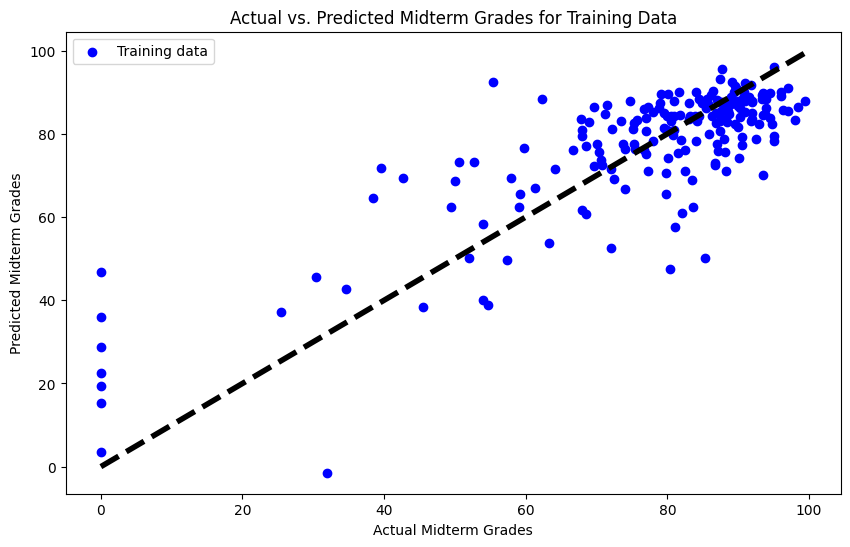

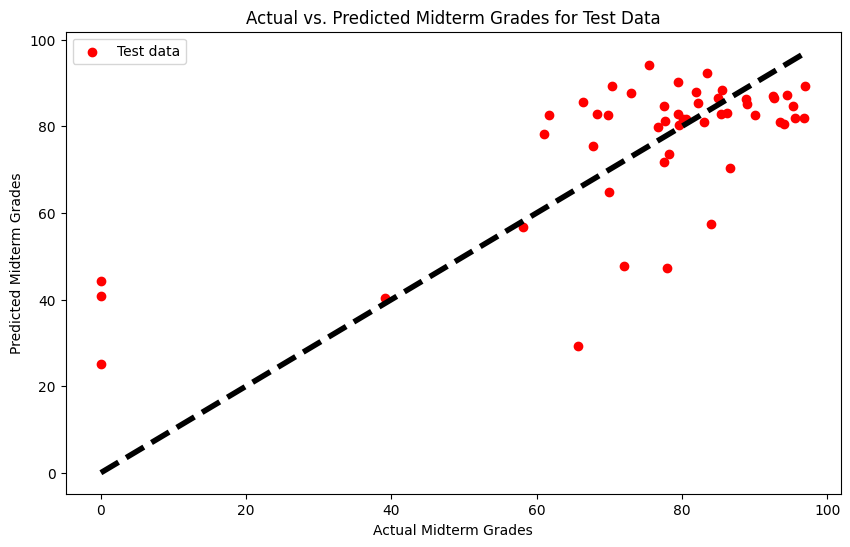

In [10]:
import matplotlib.pyplot as plt

# Get predictions
predictions_train = rr_cv.predict(X_train1)
predictions_test = rr_cv.predict(X_test1)

# Plot actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train1, predictions_train, color='blue', label='Training data')
plt.plot([y_train1.min(), y_train1.max()], [y_train1.min(), y_train1.max()], 'k--', lw=4)
plt.xlabel('Actual Midterm Grades')
plt.ylabel('Predicted Midterm Grades')
plt.title('Actual vs. Predicted Midterm Grades for Training Data')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, predictions_test, color='red', label='Test data')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=4)
plt.xlabel('Actual Midterm Grades')
plt.ylabel('Predicted Midterm Grades')
plt.title('Actual vs. Predicted Midterm Grades for Test Data')
plt.legend()
plt.show()

## **Lasso Regression**

In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train1, y_train1)

Lasso()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_lasso_train_pred = lasso.predict(X_train1)
y_lasso_test_pred = lasso.predict(X_test1)
print("Train:", r2_score(y_train1, y_lasso_train_pred))
print("Test:", r2_score(y_test1, y_lasso_test_pred))

# Training Set
lasso_train_mse = mean_squared_error(y_train1, y_lasso_train_pred)
lasso_train_r2 = r2_score(y_train1, y_lasso_train_pred)

# Testing Set
lasso_test_mse = mean_squared_error(y_test1, y_lasso_test_pred)
lasso_test_r2 = r2_score(y_test1, y_lasso_test_pred)


Train: 0.6375354578790544
Test: 0.6091723033644907


In [13]:
lasso_performance_data = ['Midterm 1 Lasso Regression', lasso_train_mse, lasso_train_r2, lasso_test_mse, lasso_test_r2]
midterm_all_performance.loc[len(midterm_all_performance)] = lasso_performance_data
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 1 Ridge Regression,140.123846,0.663041,249.780770,0.486483
1,Midterm 1 Ridge Regression CV,140.261564,0.662710,242.681684,0.501078
2,Midterm 1 Lasso Regression,150.730225,0.637535,190.103338,0.609172


#**Lasso Regression Cross Validation**

In [14]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

lasso_cv = LassoCV(cv=kfold)

lasso_cv.fit(X_train1, y_train1)
lasso_predictions_train = lasso_cv.predict(X_train1)
print("Train:", r2_score(y_train1, lasso_predictions_train))
lasso_predictions_test = lasso_cv.predict(X_test1)
print("Test:", r2_score(y_test1, lasso_predictions_test))
print("Alpha:", lasso_cv.alpha_)

lasso_cv_train_mse = mean_squared_error(y_train1, lasso_predictions_train)
lasso_cv_train_r2 = r2_score(y_train1, lasso_predictions_train)
lasso_cv_test_mse = mean_squared_error(y_test1, lasso_predictions_test)
lasso_cv_test_r2 = r2_score(y_test1, lasso_predictions_test)

Train: 0.6056721026303705
Test: 0.6317511281429969
Alpha: 2.4152316680446386


In [15]:
lasso_cv_performance_data = ['Midterm 1 Lasso Regression CV', lasso_cv_train_mse, lasso_cv_train_r2, lasso_cv_test_mse, lasso_cv_test_r2]
midterm_all_performance.loc[len(midterm_all_performance)] = lasso_cv_performance_data
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 1 Ridge Regression,140.123846,0.663041,249.780770,0.486483
1,Midterm 1 Ridge Regression CV,140.261564,0.662710,242.681684,0.501078
2,Midterm 1 Lasso Regression,150.730225,0.637535,190.103338,0.609172
3,Midterm 1 Lasso Regression CV,163.980543,0.605672,179.120724,0.631751


As we can see, alpha=2.41 improves the Test $R^2$

Lasso Regression has a higher test $R^2$

##**Elastic Net Regression**


In [16]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0)
elastic.fit(X_train1, y_train1)

ElasticNet()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

y_elastic_train_pred = elastic.predict(X_train1)
y_elastic_test_pred = elastic.predict(X_test1)
print("Train:", r2_score(y_train1, y_elastic_train_pred))
print("Test:", r2_score(y_test1, y_elastic_test_pred))

# Training Set
elastic_train_mse = mean_squared_error(y_train1, y_elastic_train_pred)
elastic_train_r2 = r2_score(y_train1, y_elastic_train_pred)

# Testing Set
elastic_test_mse = mean_squared_error(y_test1, y_elastic_test_pred)
elastic_test_r2 = r2_score(y_test1, y_elastic_test_pred)


Train: 0.6396353959375829
Test: 0.5987000415715297


In [18]:
elastic_performance_data = ['Midterm 1 Elastic Net Regression', elastic_train_mse, elastic_train_r2, elastic_test_mse, elastic_test_r2]
midterm_all_performance.loc[len(midterm_all_performance)] = elastic_performance_data
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 1 Ridge Regression,140.123846,0.663041,249.780770,0.486483
1,Midterm 1 Ridge Regression CV,140.261564,0.662710,242.681684,0.501078
2,Midterm 1 Lasso Regression,150.730225,0.637535,190.103338,0.609172
3,Midterm 1 Lasso Regression CV,163.980543,0.605672,179.120724,0.631751
4,Midterm 1 Elastic Net Regression,149.856969,0.639635,195.197174,0.598700


#**Elastic Net Regression Cross Validation**

In [19]:
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

elastic_cv = ElasticNetCV(cv=kfold)

elastic_cv.fit(X_train1, y_train1)
elastic_predictions_train = elastic_cv.predict(X_train1)
print("Train:", r2_score(y_train1, elastic_predictions_train))
elastic_predictions_test = elastic_cv.predict(X_test1)
print("Test:", r2_score(y_test1, elastic_predictions_test))
print("Alpha:", elastic_cv.alpha_)

elastic_cv_train_mse = mean_squared_error(y_train1, elastic_predictions_train)
elastic_cv_train_r2 = r2_score(y_train1, elastic_predictions_train)
elastic_cv_test_mse = mean_squared_error(y_test1, elastic_predictions_test)
elastic_cv_test_r2 = r2_score(y_test1, elastic_predictions_test)

Train: 0.6006694861655717
Test: 0.6230252806788558
Alpha: 3.407796390528433


In [20]:
elastic_cv_performance_data = ['Midterm 1 Elastic Net Regression CV', elastic_cv_train_mse, elastic_cv_train_r2, elastic_cv_test_mse, elastic_cv_test_r2]
midterm_all_performance.loc[len(midterm_all_performance)] = elastic_cv_performance_data
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 1 Ridge Regression,140.123846,0.663041,249.780770,0.486483
1,Midterm 1 Ridge Regression CV,140.261564,0.662710,242.681684,0.501078
2,Midterm 1 Lasso Regression,150.730225,0.637535,190.103338,0.609172
3,Midterm 1 Lasso Regression CV,163.980543,0.605672,179.120724,0.631751
4,Midterm 1 Elastic Net Regression,149.856969,0.639635,195.197174,0.598700
5,Midterm 1 Elastic Net Regression CV,166.060872,0.600669,183.365082,0.623025


#**Testing the Model for Lasso Regression**

In [21]:
student_id = input("Enter the Student ID: ").upper()
student_data = df[df['Student ID'] == student_id]
if len(student_data) == 0:
    print(f"Error: No data found for the student ID '{student_id}'")
else:
    #features for prediction
    X_student = student_data[['HW 1 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'HW 2 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'HW 3 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'HW 4 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'HW 5 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'HW 6 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'Week 1 Aug 24 to28 Points Grade <Numeric MaxPoints:15 Category:Activity>',
                              'Week 2 Aug 31 to Sep 4 Points Grade <Numeric MaxPoints:15 Category:Activity>',
                              'Week 3 Sep 7 to 11 Points Grade <Numeric MaxPoints:15 Category:Activity>',
                              'Week 4 Sep 14 to 18 Points Grade <Numeric MaxPoints:15 Category:Activity>',
                              'Week 5 Sep 21 to 25 Points Grade <Numeric MaxPoints:15 Category:Activity>',
                              'Week 1 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 1 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 2 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 2 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 3 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 3 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 4 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 4 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 5 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 5 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Quiz 1 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
                              'Quiz 1 Points Grade <Numeric MaxPoints:33 Category:Quizzes>']]

lasso_cv_predictions = lasso_cv.predict(X_student)

actual_score = student_data['Midterm 1 Points Grade <Numeric MaxPoints:100 Category:Midterms>'].values[0]

print(f"Predictions for Student ID {student_id}: {lasso_cv_predictions}%")
print(f"Actual Score for Student ID {student_id}: {actual_score}%")

Enter the Student ID: s21.25
Predictions for Student ID S21.25: [63.96479287]%
Actual Score for Student ID S21.25: 71.98%


#**Testing the Model for Ridge Regression**

In [22]:
student_id = input("Enter the Student ID: ").upper()
student_data = df[df['Student ID'] == student_id]
if len(student_data) == 0:
    print(f"Error: No data found for the student ID '{student_id}'")
else:
    #features for prediction
    X_student = student_data[['HW 1 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'HW 2 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'HW 3 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'HW 4 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'HW 5 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'HW 6 Points Grade <Numeric MaxPoints:8 Category:Homework>',
                              'Week 1 Aug 24 to28 Points Grade <Numeric MaxPoints:15 Category:Activity>',
                              'Week 2 Aug 31 to Sep 4 Points Grade <Numeric MaxPoints:15 Category:Activity>',
                              'Week 3 Sep 7 to 11 Points Grade <Numeric MaxPoints:15 Category:Activity>',
                              'Week 4 Sep 14 to 18 Points Grade <Numeric MaxPoints:15 Category:Activity>',
                              'Week 5 Sep 21 to 25 Points Grade <Numeric MaxPoints:15 Category:Activity>',
                              'Week 1 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 1 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 2 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 2 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 3 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 3 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 4 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 4 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 5 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Week 5 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
                              'Quiz 1 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
                              'Quiz 1 Points Grade <Numeric MaxPoints:33 Category:Quizzes>']]

rr_cv_predictions = rr_cv.predict(X_student)

actual_score = student_data['Midterm 1 Points Grade <Numeric MaxPoints:100 Category:Midterms>'].values[0]

print(f"Predictions for Student ID {student_id}: {rr_cv_predictions}%")
print(f"Actual Score for Student ID {student_id}: {actual_score}%")

Enter the Student ID: s21.25
Predictions for Student ID S21.25: [71.53452212]%
Actual Score for Student ID S21.25: 71.98%


The models struggle to predict the Midterm 1 grade for B, C, D, and WU students

#**Midterm 2 Features**

In [23]:
#Midterm 2 assignments
midterm2_x = df.loc[:,[
    'HW 1 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 2 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 3 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 4 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 5 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 6 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'Week 1 Aug 24 to28 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 2 Aug 31 to Sep 4 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 3 Sep 7 to 11 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 4 Sep 14 to 18 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 5 Sep 21 to 25 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 1 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 1 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 2 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 2 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 3 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 3 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 4 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 4 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 5 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 5 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Quiz 1 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
       'Quiz 1 Points Grade <Numeric MaxPoints:33 Category:Quizzes>',
       'HW 7 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 8 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 9 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 10 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 11 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 12 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'Week 6 Sep 28 to Oct 2 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 7 Oct 5 to 9 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 8 Oct 12 to 16 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 9 Oct 19 to 23 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 10 Oct 26 to 30 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 11 Nov 2 to 6 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 6 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 6 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 7 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 7 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 8 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 8 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 9 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 9 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 10 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 10 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 11 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 11 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Quiz 2 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
       'Quiz 2 Points Grade <Numeric MaxPoints:33 Category:Quizzes>'
       ]]

midterm2_y = df['Midterm 2 Points Grade <Numeric MaxPoints:100 Category:Midterms>']

In [ ]:
from sklearn.model_selection import train_test_split

X2=midterm2_x
y2=midterm2_y

(X_train2, X_test2, y_train2, y_test2) = train_test_split(X2, y2, test_size=0.2, random_state=0) #random state used for reproducibility
#print("Training set", X_train2)
#print("Test set", y_test2)

#**Ridge Regression Midterm 2**

In [25]:
from sklearn.linear_model import Ridge

rr2 = Ridge(alpha=1.0)
rr2.fit(X_train2, y_train2)

Ridge()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_rr2_train_pred = rr2.predict(X_train2)
y_rr2_test_pred = rr2.predict(X_test2)
print("Train:", r2_score(y_train2, y_rr2_train_pred))
print("Test:", r2_score(y_test2, y_rr2_test_pred))

# Training Set
rr2_train_mse = mean_squared_error(y_train2, y_rr2_train_pred)
rr2_train_r2 = r2_score(y_train2, y_rr2_train_pred)

# Testing Set
rr2_test_mse = mean_squared_error(y_test2, y_rr2_test_pred)
rr2_test_r2 = r2_score(y_test2, y_rr2_test_pred)

Train: 0.8602152154054145
Test: 0.7070121066145632


In [27]:
rr2_performance_data = [['Midterm 2 Ridge Regression', rr2_train_mse, rr2_train_r2, rr2_test_mse, rr2_test_r2]]
midterm_all_performance = pd.DataFrame(rr2_performance_data, columns=['Model', 'Training MSE', 'Training R2 Score', 'Testing MSE', 'Testing R2 Score'])
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 2 Ridge Regression,90.162859,0.860215,204.727241,0.707012


#**Ridge Regression Regularization Midterm 2**

In [28]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

rr2_cv = RidgeCV(cv=kfold)

#Fit model
rr2_cv.fit(X_train2, y_train2)
predictions_train2 = rr2_cv.predict(X_train2)
print("Train:", r2_score(y_train2, predictions_train2))
predictions_test2 = rr2_cv.predict(X_test2)
print("Test:", r2_score(y_test2, predictions_test2))
print("Alpha:", rr2_cv.alpha_)

rr2_cv_train_mse = mean_squared_error(y_train2, predictions_train2)
rr2_cv_train_r2 = r2_score(y_train2, predictions_train2)
rr2_cv_test_mse = mean_squared_error(y_test1, predictions_test2)
rr2_cv_test_r2 = r2_score(y_test2, predictions_test2)

Train: 0.8588135849597905
Test: 0.7166483250671027
Alpha: 10.0


In [29]:
rr2_cv_performance_data = ['Midterm 2 Ridge Regression CV', rr2_cv_train_mse, rr2_cv_train_r2, rr2_cv_test_mse, rr2_cv_test_r2]
midterm_all_performance.loc[len(midterm_all_performance)] = rr2_cv_performance_data
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 2 Ridge Regression,90.162859,0.860215,204.727241,0.707012
1,Midterm 2 Ridge Regression CV,91.066927,0.858814,181.282451,0.716648


#**Lasso Regression Midterm 2**

In [30]:
from sklearn.linear_model import Lasso
lasso2 = Lasso(alpha=1.0)
lasso2.fit(X_train2, y_train2)

Lasso()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_lasso2_train_pred = lasso2.predict(X_train2)
y_lasso2_test_pred = lasso2.predict(X_test2)
print("Train:", r2_score(y_train2, y_lasso2_train_pred))
print("Test:", r2_score(y_test2, y_lasso2_test_pred))

# Training Set
lasso2_train_mse = mean_squared_error(y_train2, y_lasso2_train_pred)
lasso2_train_r2 = r2_score(y_train2, y_lasso2_train_pred)

# Testing Set
lasso2_test_mse = mean_squared_error(y_test2, y_lasso2_test_pred)
lasso2_test_r2 = r2_score(y_test2, y_lasso2_test_pred)

Train: 0.8281324443318026
Test: 0.7772193839902276


In [32]:
lasso2_performance_data = ['Midterm 2 Lasso Regression', lasso2_train_mse, lasso2_train_r2, lasso2_test_mse, lasso2_test_r2]
midterm_all_performance.loc[len(midterm_all_performance)] = lasso2_performance_data
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 2 Ridge Regression,90.162859,0.860215,204.727241,0.707012
1,Midterm 2 Ridge Regression CV,91.066927,0.858814,181.282451,0.716648
2,Midterm 2 Lasso Regression,110.856630,0.828132,155.669439,0.777219


#**Lasso Regression Regularization Midterm 2**

In [33]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

lasso2_cv = LassoCV(cv=kfold)

lasso2_cv.fit(X_train2, y_train2)
lasso2_predictions_train = lasso2_cv.predict(X_train2)
print("Train:", r2_score(y_train2, lasso2_predictions_train))
lasso2_predictions_test = lasso2_cv.predict(X_test2)
print("Test:", r2_score(y_test2, lasso2_predictions_test))
print("Alpha:", lasso2_cv.alpha_)

lasso2_cv_train_mse = mean_squared_error(y_train2, lasso2_predictions_train)
lasso2_cv_train_r2 = r2_score(y_train2, lasso2_predictions_train)
lasso2_cv_test_mse = mean_squared_error(y_test2, lasso2_predictions_test)
lasso2_cv_test_r2 = r2_score(y_test2, lasso2_predictions_test)

Train: 0.805821863793494
Test: 0.7819334520871131
Alpha: 3.57087083609277


In [34]:
lasso2_cv_performance_data = ['Midterm 2 Lasso Regression CV', lasso2_cv_train_mse, lasso2_cv_train_r2, lasso2_cv_test_mse, lasso2_cv_test_r2]
midterm_all_performance.loc[len(midterm_all_performance)] = lasso2_cv_performance_data
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 2 Ridge Regression,90.162859,0.860215,204.727241,0.707012
1,Midterm 2 Ridge Regression CV,91.066927,0.858814,181.282451,0.716648
2,Midterm 2 Lasso Regression,110.856630,0.828132,155.669439,0.777219
3,Midterm 2 Lasso Regression CV,125.247221,0.805822,152.375452,0.781933


#**Elastic Net Regression Midterm 2**

In [35]:
from sklearn.linear_model import ElasticNet
elastic2 = ElasticNet(alpha=1.0)
elastic2.fit(X_train2, y_train2)

ElasticNet()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

y_elastic2_train_pred = elastic2.predict(X_train2)
y_elastic2_test_pred = elastic2.predict(X_test2)
print("Train:", r2_score(y_train2, y_elastic2_train_pred))
print("Test:", r2_score(y_test2, y_elastic2_test_pred))

# Training Set
elastic2_train_mse = mean_squared_error(y_train2, y_elastic2_train_pred)
elastic2_train_r2 = r2_score(y_train2, y_elastic2_train_pred)

# Testing Set
elastic2_test_mse = mean_squared_error(y_test2, y_elastic2_test_pred)
elastic2_test_r2 = r2_score(y_test2, y_elastic2_test_pred)

Train: 0.832531025132837
Test: 0.7767079445895775


In [37]:
elastic2_performance_data = ['Midterm 2 Elastic Net Regression', elastic2_train_mse, elastic2_train_r2, elastic2_test_mse, elastic2_test_r2]
midterm_all_performance.loc[len(midterm_all_performance)] = elastic2_performance_data
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 2 Ridge Regression,90.162859,0.860215,204.727241,0.707012
1,Midterm 2 Ridge Regression CV,91.066927,0.858814,181.282451,0.716648
2,Midterm 2 Lasso Regression,110.856630,0.828132,155.669439,0.777219
3,Midterm 2 Lasso Regression CV,125.247221,0.805822,152.375452,0.781933
4,Midterm 2 Elastic Net Regression,108.019493,0.832531,156.026810,0.776708


#**Elastic Net Regression Midterm 2 Cross Validation**

In [38]:
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

elastic2_cv = ElasticNetCV(cv=kfold)

elastic2_cv.fit(X_train2, y_train2)
elastic2_predictions_train = elastic2_cv.predict(X_train2)
print("Train:", r2_score(y_train2, elastic2_predictions_train))
elastic2_predictions_test = elastic2_cv.predict(X_test2)
print("Test:", r2_score(y_test2, elastic2_predictions_test))
print("Alpha:", elastic2_cv.alpha_)

elastic2_cv_train_mse = mean_squared_error(y_train2, elastic2_predictions_train)
elastic2_cv_train_r2 = r2_score(y_train2, elastic2_predictions_train)
elastic2_cv_test_mse = mean_squared_error(y_test2, elastic2_predictions_test)
elastic2_cv_test_r2 = r2_score(y_test2, elastic2_predictions_test)

Train: 0.8016192581034725
Test: 0.7788197859583184
Alpha: 5.038357565149017


In [39]:
elastic2_cv_performance_data = ['Midterm 2 Elastic Net Regression CV', elastic2_cv_train_mse, elastic2_cv_train_r2, elastic2_cv_test_mse, elastic2_cv_test_r2]
midterm_all_performance.loc[len(midterm_all_performance)] = elastic2_cv_performance_data
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Midterm 2 Ridge Regression,90.162859,0.860215,204.727241,0.707012
1,Midterm 2 Ridge Regression CV,91.066927,0.858814,181.282451,0.716648
2,Midterm 2 Lasso Regression,110.856630,0.828132,155.669439,0.777219
3,Midterm 2 Lasso Regression CV,125.247221,0.805822,152.375452,0.781933
4,Midterm 2 Elastic Net Regression,108.019493,0.832531,156.026810,0.776708
5,Midterm 2 Elastic Net Regression CV,127.957952,0.801619,154.551147,0.778820


#**Testing the Model for Lasso Regression Midterm 2**

In [ ]:
student_id = input("Enter the Student ID: ").upper()
student_data = df[df['Student ID'] == student_id]
if len(student_data) == 0:
    print(f"Error: No data found for the student ID '{student_id}'")
else:
    #features for prediction
    X_student_lasso = student_data[['HW 1 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 2 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 3 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 4 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 5 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 6 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'Week 1 Aug 24 to28 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 2 Aug 31 to Sep 4 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 3 Sep 7 to 11 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 4 Sep 14 to 18 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 5 Sep 21 to 25 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 1 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 1 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 2 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 2 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 3 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 3 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 4 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 4 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 5 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 5 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Quiz 1 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
       'Quiz 1 Points Grade <Numeric MaxPoints:33 Category:Quizzes>',
       'HW 7 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 8 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 9 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 10 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 11 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 12 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'Week 6 Sep 28 to Oct 2 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 7 Oct 5 to 9 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 8 Oct 12 to 16 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 9 Oct 19 to 23 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 10 Oct 26 to 30 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 11 Nov 2 to 6 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 6 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 6 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 7 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 7 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 8 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 8 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 9 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 9 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 10 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 10 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 11 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 11 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Quiz 2 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
       'Quiz 2 Points Grade <Numeric MaxPoints:33 Category:Quizzes>']]

lasso2_cv_predictions = lasso2_cv.predict(X_student_lasso)

actual_score = student_data['Midterm 2 Points Grade <Numeric MaxPoints:100 Category:Midterms>'].values[0]

print(f"Predictions for Student ID {student_id}: {lasso2_cv_predictions}%")
print(f"Actual Score for Student ID {student_id}: {actual_score}%")

Enter the Student ID: f20.27
Predictions for Student ID F20.27: [93.56861451]%
Actual Score for Student ID F20.27: 89.2%


#**Testing the Model for Ridge Regression Midterm 2**

In [ ]:
student_id = input("Enter the Student ID: ").upper()
student_data = df[df['Student ID'] == student_id]
if len(student_data) == 0:
    print(f"Error: No data found for the student ID '{student_id}'")
else:
    #features for prediction
    X_student_rr = student_data[['HW 1 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 2 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 3 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 4 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 5 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 6 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'Week 1 Aug 24 to28 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 2 Aug 31 to Sep 4 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 3 Sep 7 to 11 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 4 Sep 14 to 18 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 5 Sep 21 to 25 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 1 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 1 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 2 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 2 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 3 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 3 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 4 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 4 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 5 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 5 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Quiz 1 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
       'Quiz 1 Points Grade <Numeric MaxPoints:33 Category:Quizzes>',
       'HW 7 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 8 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 9 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 10 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 11 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 12 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'Week 6 Sep 28 to Oct 2 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 7 Oct 5 to 9 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 8 Oct 12 to 16 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 9 Oct 19 to 23 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 10 Oct 26 to 30 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 11 Nov 2 to 6 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 6 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 6 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 7 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 7 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 8 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 8 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 9 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 9 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 10 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 10 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 11 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 11 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Quiz 2 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
       'Quiz 2 Points Grade <Numeric MaxPoints:33 Category:Quizzes>']]

rr2_cv_predictions = rr2_cv.predict(X_student_rr)

actual_score = student_data['Midterm 2 Points Grade <Numeric MaxPoints:100 Category:Midterms>'].values[0]

print(f"Predictions for Student ID {student_id}: {rr2_cv_predictions}%")
print(f"Actual Score for Student ID {student_id}: {actual_score}%")

Enter the Student ID: f20.21
Predictions for Student ID F20.21: [68.44987431]%
Actual Score for Student ID F20.21: 51.98%


#**Final Exam Features**

In [45]:
#Final Exam assignments
final_x = df.loc[:,[
    'HW 1 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 2 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 3 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 4 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 5 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 6 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 7 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 8 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 9 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 10 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 11 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 12 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 13 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 14 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 15 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 16 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 17 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 18 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 19 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 20 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 21 Points Grade <Numeric MaxPoints:6.4 Category:Homework>',
       'HW 22 Points Grade <Numeric MaxPoints:8 Category:Homework>',
       'HW 23 Points Grade <Numeric MaxPoints:8 Category:Homework>',

       'Week 1 Aug 24 to28 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 2 Aug 31 to Sep 4 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 3 Sep 7 to 11 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 4 Sep 14 to 18 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 5 Sep 21 to 25 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 6 Sep 28 to Oct 2 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 7 Oct 5 to 9 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 8 Oct 12 to 16 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 9 Oct 19 to 23 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 10 Oct 26 to 30 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 11 Nov 2 to 6 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 12 Nov 9 to 13 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 13 Nov 16 to 20 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 14 Nov 23 to 27 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 15 Nov 30 to Dec 4 Points Grade <Numeric MaxPoints:15 Category:Activity>',
       'Week 16 Dec 7 to 11 Points Grade <Numeric MaxPoints:15 Category:Activity>',

       'Week 1 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 1 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 2 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 2 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 3 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 3 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 4 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 4 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 5 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 5 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 6 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 6 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 7 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 7 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 8 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 8 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 9 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 9 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 10 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 10 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 11 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 11 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 12 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 12 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 13 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 13 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 14 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 14 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 15 Day 1 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',
       'Week 15 Day 2 Lecture Points Grade <Numeric MaxPoints:4 Category:Lecture Attendance-Participation>',

       'Quiz 1 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
       'Quiz 1 Points Grade <Numeric MaxPoints:33 Category:Quizzes>',
       'Quiz 2 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
       'Quiz 2 Points Grade <Numeric MaxPoints:33 Category:Quizzes>',
       'Quiz 3 Points Grade <Numeric MaxPoints:33 Category:Quizzes>',
       'Quiz 3 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',

       'Midterm 1 Points Grade <Numeric MaxPoints:100 Category:Midterms>',
       'Midterm 1 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>',
       'Midterm 2 Points Grade <Numeric MaxPoints:100 Category:Midterms>',
       'Midterm 2 Points Grade <Numeric MaxPoints:13 Category:Maintenance & Improvement>'
       ]]

final_y = df['Final Points Grade <Numeric MaxPoints:150 Category:Final Exam>']

**Training and Test Data**

In [46]:
Xf=final_x
yf=final_y

(X_trainf, X_testf, y_trainf, y_testf) = train_test_split(Xf, yf, test_size=0.2, random_state=0)

#**Ridge Regression Final Exam**

In [50]:
from sklearn.linear_model import Ridge

rrf = Ridge(alpha=1.0)
rrf.fit(X_trainf, y_trainf)

Ridge()

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

y_rrf_train_pred = rrf.predict(X_trainf)
y_rrf_test_pred = rrf.predict(X_testf)
print("Train:", r2_score(y_trainf, y_rrf_train_pred))
print("Test:", r2_score(y_testf, y_rrf_test_pred))

# Training Set
rrf_train_mse = mean_squared_error(y_trainf, y_rrf_train_pred)
rrf_train_r2 = r2_score(y_trainf, y_rrf_train_pred)

# Testing Set
rrf_test_mse = mean_squared_error(y_testf, y_rrf_test_pred)
rrf_test_r2 = r2_score(y_testf, y_rrf_test_pred)

Train: 0.912236919730937
Test: 0.7714761339284587


In [52]:
rrf_performance_data = [['Final Exam Ridge Regression', rrf_train_mse, rrf_train_r2, rrf_test_mse, rrf_test_r2]]
midterm_all_performance = pd.DataFrame(rrf_performance_data, columns=['Model', 'Training MSE', 'Training R2 Score', 'Testing MSE', 'Testing R2 Score'])
midterm_all_performance

,Model,Training MSE,Training R2 Score,Testing MSE,Testing R2 Score
0,Final Exam Ridge Regression,166.705129,0.912237,520.866014,0.771476


#**Ridge Regression Cross Validation Final Exam**

In [53]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

rrf_cv = RidgeCV(cv=kfold)

#Fit model
rrf_cv.fit(X_trainf, y_trainf)
predictions_trainf = rrf_cv.predict(X_trainf)
print("Train:", r2_score(y_trainf, predictions_trainf))
predictions_testf = rrf_cv.predict(X_testf)
print("Test:", r2_score(y_testf, predictions_testf))
print("Alpha:", rrf_cv.alpha_)

rrf_cv_train_mse = mean_squared_error(y_trainf, predictions_trainf)
rrf_cv_train_r2 = r2_score(y_trainf, predictions_trainf)
rrf_cv_test_mse = mean_squared_error(y_testf, predictions_testf)
rrf_cv_test_r2 = r2_score(y_testf, predictions_testf)

Train: 0.9110720214275786
Test: 0.7813983232009013
Alpha: 10.0


#**Dash App**

In [ ]:
#pip install dash

In [ ]:
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd

app = Dash(__name__)

#layout of the app
app.layout = html.Div([
    html.H1("Grades Visualization", style={'fontFamily': 'Arial, sans-serif'}),
    dcc.Graph(id='grade-pie-chart'),
    dcc.Graph(id='grade-histogram')
])

# callback function to update the pie chart
@app.callback(
    Output('grade-pie-chart', 'figure'),
    [Input('grade-pie-chart', 'id')]
)
def update_pie_chart(selected_grade):
    grade_counts = df['GRADE'].value_counts()
    pie_trace = go.Pie(labels=grade_counts.index, values=grade_counts.values)
    fig = go.Figure(data=[pie_trace])
    fig.update_layout(title='Distribution of Grades')
    return fig

# callback function to update the bar chart for Midterm 1 Points Grade
@app.callback(
    Output('grade-histogram', 'figure'),
    [Input('grade-histogram', 'id')]
)
def update_histogram(selected_grade):
    # Create the histogram trace
    histogram_trace = go.Histogram(x=df['Midterm 1 Points Grade <Numeric MaxPoints:100 Category:Midterms>'],
                                   nbinsx=20,  # Adjust the number of bins as needed
                                   marker=dict(color='lightblue'))
    layout = go.Layout(title='Distribution of Midterm 1 Grades',
                       xaxis=dict(title='Grade'),
                       yaxis=dict(title='Count'))
    fig = go.Figure(data=[histogram_trace], layout=layout)
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>